# Predicting House Prices 

Welcome to the home price prediction challenge! Let delve into a comprehensive dataset that goes beyond the conventional factors like bedroom count and exterior aesthetics. We will explore 79 explanatory variables that provide insights into nearly every aspect of residential homes in Ames, Iowa.

Our task is to develop a robust predictive model that can accurately estimate the prices of residential properties based on these diverse variables. Through this challenge, we aim to gain a deeper understanding of the housing market and explore the intricate relationships between different aspects of a home and its market value.

the data set is provided at 'https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview'

# The Model Exploration

In this notebook, I will explore three tree-based techniques that have shown successful applications in various domains:

Random Forest: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It has been widely used for its ability to handle complex datasets and provide accurate results.

Xgboost: Xgboost, short for Extreme Gradient Boosting, is a gradient boosting framework known for its efficiency and performance. It is designed to optimize the gradient boosting algorithm and has gained popularity for its ability to handle large-scale datasets.

LightGBM: LightGBM is another gradient boosting framework that offers high performance and efficiency. It is particularly suitable for large datasets and has been widely adopted in various machine learning competitions.

By exploring these tree-based techniques, we can leverage their strengths to build robust models and make accurate predictions for the house pricing dataset.

### Data fields

Here's a brief version of what you'll find in the data description file.

 - SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
 - MSSubClass: The building class
 - MSZoning: The general zoning classification
 - LotFrontage: Linear feet of street connected to property
 - LotArea: Lot size in square feet
 - Street: Type of road access
 - Alley: Type of alley access
 - LotShape: General shape of property
 - LandContour: Flatness of the property
 - Utilities: Type of utilities available
 - LotConfig: Lot configuration
 - LandSlope: Slope of property
 - Neighborhood: Physical locations within Ames city limits
 - Condition1: Proximity to main road or railroad
 - Condition2: Proximity to main road or railroad (if a second is present)
 - BldgType: Type of dwelling
 - HouseStyle: Style of dwelling
 - OverallQual: Overall material and finish quality
 - OverallCond: Overall condition rating
 - YearBuilt: Original construction date
 - YearRemodAdd: Remodel date
 - RoofStyle: Type of roof
 - RoofMatl: Roof material
 - Exterior1st: Exterior covering on house
 - Exterior2nd: Exterior covering on house (if more than one material)
 - MasVnrType: Masonry veneer type
 - MasVnrArea: Masonry veneer area in square feet
 - ExterQual: Exterior material quality
 - ExterCond: Present condition of the material on the exterior
 - Foundation: Type of foundation
 - BsmtQual: Height of the basement
 - BsmtCond: General condition of the basement
 - BsmtExposure: Walkout or garden level basement walls
 - BsmtFinType1: Quality of basement finished area
 - BsmtFinSF1: Type 1 finished square feet
 - BsmtFinType2: Quality of second finished area (if present)
 - BsmtFinSF2: Type 2 finished square feet
 - BsmtUnfSF: Unfinished square feet of basement area
 - TotalBsmtSF: Total square feet of basement area
 - Heating: Type of heating
 - HeatingQC: Heating quality and condition
 - CentralAir: Central air conditioning
 - Electrical: Electrical system
 - 1stFlrSF: First Floor square feet
 - 2ndFlrSF: Second floor square feet
 - LowQualFinSF: Low quality finished square feet (all floors)
 - GrLivArea: Above grade (ground) living area square feet
 - BsmtFullBath: Basement full bathrooms
 - BsmtHalfBath: Basement half bathrooms
 - FullBath: Full bathrooms above grade
 - HalfBath: Half baths above grade
 - Bedroom: Number of bedrooms above basement level
 - Kitchen: Number of kitchens
 - KitchenQual: Kitchen quality
 - TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
 - Functional: Home functionality rating
 - Fireplaces: Number of fireplaces
 - FireplaceQu: Fireplace quality
 - GarageType: Garage location
 - GarageYrBlt: Year garage was built
 - GarageFinish: Interior finish of the garage
 - GarageCars: Size of garage in car capacity
 - GarageArea: Size of garage in square feet
 - GarageQual: Garage quality
 - GarageCond: Garage condition
 - PavedDrive: Paved driveway
 - WoodDeckSF: Wood deck area in square feet
 - OpenPorchSF: Open porch area in square feet
 - EnclosedPorch: Enclosed porch area in square feet
 - 3SsnPorch: Three season porch area in square feet
 - ScreenPorch: Screen porch area in square feet
 - PoolArea: Pool area in square feet
 - PoolQC: Pool quality
 - Fence: Fence quality
 - MiscFeature: Miscellaneous feature not covered in other categories
 - MiscVal: $Value of miscellaneous feature
 - MoSold: Month Sold
 - YrSold: Year Sold
 - SaleType: Type of sale
 - SaleCondition: Condition of sale

## Setup


The code below imports libraries and modules commonly used in data analysis, machine learning, and visualization tasks.

It starts by importing scientific libraries such as ``pandas``, ``numpy``, ``math``, and ``matplotlib.pyplot``. These libraries provide functionality for data manipulation, mathematical operations, and creating visualizations. The seaborn library is also imported, which is a data visualization library based on matplotlib that offers high-level functions for creating attractive and informative statistical graphics.

Warnings module is imported to handle warning messages, and '``warnings.filterwarnings('ignore')``' is used to ignore warning messages during the execution of the code.

Next, it imports various classes and functions from scikit-learn (``sklearn``) library. These include transformers such as ColumnTransformer for applying transformations to different columns, SimpleImputer for imputing missing values, and OneHotEncoder for one-hot encoding categorical variables.

The Pipeline class is imported for creating a pipeline to chain multiple preprocessing and modeling steps together.

For sampling, the code imports KFold for performing k-fold cross-validation, ``cross_validate`` for evaluating models using cross-validation, and ``train_test_split`` for splitting the dataset into training and testing sets.

To perform hyperparameter tuning, ``GridSearchCV`` class is imported, which is used for performing grid search cross-validation to find the best hyperparameters for a model.

For model evaluation, ``mean_squared_error`` and ``r2_score`` functions are imported from the metrics module of scikit-learn. These functions are used to calculate the mean squared error and the coefficient of determination (R-squared) for regression models, respectively.

The code also imports different regression models, including ``RandomForestRegressor`` from the ensemble module, ``xgboost`` as ``xgb`` library for `XGBoost` regressor, and ``LGBMRegressor`` from the ``lightgbm`` library for LightGBM regressor. These models are commonly used for regression tasks.

Lastly, it imports seaborn and ``matplotlib.pyplot`` libraries again for creating visualizations, and missingno library is imported for analyzing missing values in the dataset.

These import statements ensure that the necessary libraries, modules, classes, and functions are available for performing data analysis, visualization, model building, hyperparameter tuning, and model evaluation tasks.

In [115]:
# scientifit libraries
import pandas as pd
import pandas as pd
import math 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import joblib

import warnings
warnings.filterwarnings('ignore')

# sklearn transformers
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

from feature_engine import encoding as enc #RareLabelEncoder, OrdinalEncoder
from feature_engine.selection import SelectByTargetMeanPerformance, DropFeatures 
from feature_engine.creation import RelativeFeatures, MathFeatures
from feature_engine.creation import RelativeFeatures, MathFeatures
# sk-learn pipeline
from sklearn.pipeline import Pipeline

# sampling
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Regression models
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor


# graphical libraries
import seaborn as sns
import matplotlib.pyplot as plt

# a library to analyze missing values
import missingno as msno


## Data Collection and Analysis

### instance global variables and collect data

In [116]:
# instance global variables
filepath = 'data/house-prices/'

testpath = filepath + 'test.csv'
trainpath = filepath + 'train.csv'

test_data = pd.read_csv(testpath)
train_data = pd.read_csv(trainpath)

### First look

Let's look at the first entries in train dataset and missing values.

In [117]:
## printing the top5 entries
pd.pandas.set_option('display.max_columns',None)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [118]:
# train data set info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [119]:
# test data set info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [120]:
import numpy as np

def check_missing_values(dataset):
    """
    Check for missing values in each feature of the dataset.

    Parameters:
    dataset (DataFrame): The input dataset.

    Returns:
    list: A list of features with missing values.
    """
    features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 1]
    return features_with_na


def percentage_missing(dataset):
    """
    Calculate and print the percentage of missing values in each feature of the dataset.

    Parameters:
    dataset (DataFrame): The input dataset.
    """
    features_with_na = check_missing_values(dataset)
    for feature in features_with_na:
        percentage_missing = np.round(dataset[feature].isnull().mean() * 100, 2)
        print(f"{feature}: {percentage_missing}% missing values")
        
def check_duplicates(dataset):
    """
    Checks for duplicates in a dataset.

    Parameters:
    - dataset (pandas.DataFrame): The input dataset to check for duplicates.

    Returns:
    - int: The number of duplicate rows in the dataset.

    Example Usage:
    >>> dataset = pd.DataFrame({'col1': [1, 2, 3, 4, 2], 'col2': ['A', 'B', 'C', 'D', 'B']})
    >>> num_duplicates = check_duplicates(dataset)
    >>> print(num_duplicates)
    1
    """
    return dataset.duplicated().sum()



In [121]:
features_with_na = check_missing_values(train_data)
print(features_with_na)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [122]:
percentage_missing(train_data)

LotFrontage: 17.74% missing values
Alley: 93.77% missing values
MasVnrType: 0.55% missing values
MasVnrArea: 0.55% missing values
BsmtQual: 2.53% missing values
BsmtCond: 2.53% missing values
BsmtExposure: 2.6% missing values
BsmtFinType1: 2.53% missing values
BsmtFinType2: 2.6% missing values
FireplaceQu: 47.26% missing values
GarageType: 5.55% missing values
GarageYrBlt: 5.55% missing values
GarageFinish: 5.55% missing values
GarageQual: 5.55% missing values
GarageCond: 5.55% missing values
PoolQC: 99.52% missing values
Fence: 80.75% missing values
MiscFeature: 96.3% missing values


In [123]:
# check duplicates
train_duplicate = check_duplicates(train_data)
test_duplicate = check_duplicates(test_data)

print(train_duplicate,test_duplicate)

0 0


### Missing Value Trade-Off

due to the high amount of missing values ​​in a few columns, I then decide, for a better performance of the models, to remove columns that have more than $80\%$ of their values ​​being considered missing.

### Separate columns into nominal, ordinal, numeric

considering the description of the data, I decide, as a Data Scientist, to separate the features into different types according to their functionality in the data.

In [143]:
nominal = ['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 
                   'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                   'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                   'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MoSold',
                   'SaleType', 'SaleCondition', 'Alley', 'MiscFeature']

ordinal = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 
                   'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                   'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 
                   'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                   'PavedDrive', 'PoolQC', 'Fence']


numeric = ['Id','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
                  'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                  'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd',
                  'Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                  '3SsnPorch','ScreenPorch','PoolArea','MiscVal', 'GarageYrBlt', 'YrSold', 'SalePrice']

categorical = nominal+ordinal

In [144]:
train_data[categorical] = train_data[categorical].astype('O', errors = 'ignore')
train_data[numeric] = train_data[numeric].astype('int', errors = 'ignore')

# Summarize numerical variables
train_data.describe(include = [np.number])

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [145]:
# Summarize categorical variables
train_data.describe(include = ['O'])

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,9,8,5,8,10,9,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,12,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,6,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,397,821,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,253,1267,1198


### Visualize Target Variable(SalePrice)

The distribution of the SalePrice variable is skewed to the left, indicating a higher concentration of lower prices and a tail of higher prices.


Note that There are some outliers present in the data:

To address these issues and achieve a more normalized distribution, a log-transformation can be applied to the SalePrice variable.

This transformation helps in reducing the skewness and brings the data closer to a normal distribution, which is often beneficial for statistical analysis and modeling tasks.

<Figure size 1296x432 with 0 Axes>

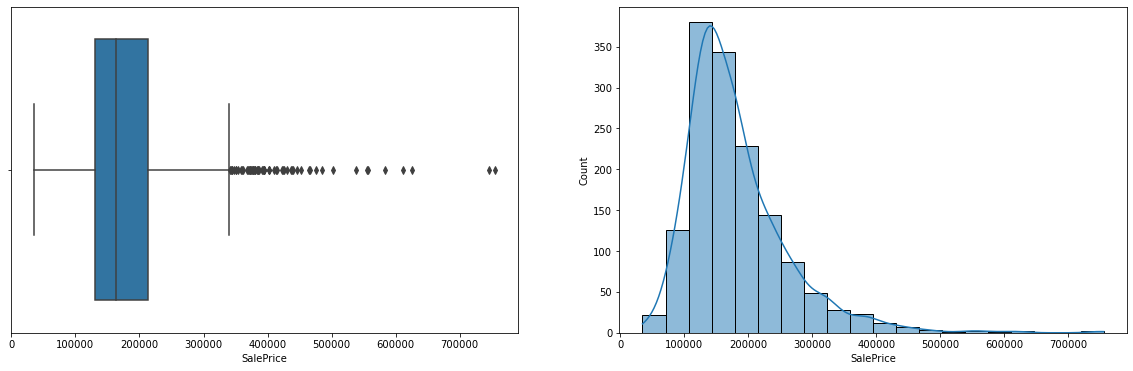

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_and_export_plot(df_train, file_path):
    '''
    Creates a plot using the given DataFrame and exports it as a JPEG file.

    Parameters:
    - df_train: pandas DataFrame
        The DataFrame used to create the plot.
    - file_path: str
        The file path to save the exported plot.

    Returns:
    - None
    '''
    plt.figure(figsize=(18, 6))
    f, axes = plt.subplots(1, 2, figsize=(20, 6))
    sns.boxplot(x=df_train["SalePrice"], ax=axes[0])
    sns.histplot(df_train["SalePrice"], kde=True, bins=20, ax=axes[1])
    plt.show()
    f.savefig(file_path)

# Example usage
create_and_export_plot(train_data, 'saleprice.jpeg')


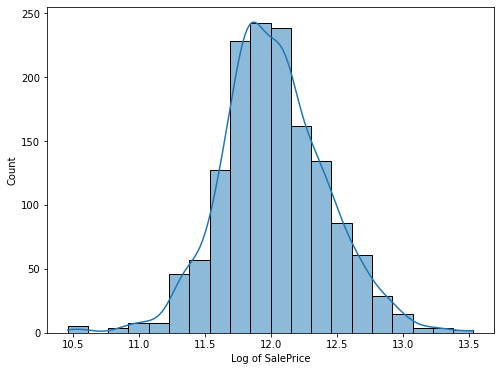

<Figure size 432x288 with 0 Axes>

In [149]:

def plot_log_sale_price(df_train):
    plt.figure(figsize=(8, 6))
    sns.histplot(np.log(df_train["SalePrice"]), kde=True, bins=20)
    plt.ylabel('Count')
    plt.xlabel('Log of SalePrice')
    plt.show()
    plt.savefig('logsaleprice.jpeg')
    
plot_log_sale_price(train_data)

In [151]:
def detect_outliers(df_train):
    stat = df_train.SalePrice.describe()
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))
    print(stat)
    
detect_outliers(train_data)


The upper and lower bounds for suspected outliers are 340037.5 and 3937.5.
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


### Is there potential outliers?

In [153]:
#check potential outlier below lower bound
stat = train_data.SalePrice.describe()
IQR = stat['75%'] - stat['25%']
train_data[train_data.SalePrice < stat['25%'] - 1.5 * IQR]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**As we can see, there are no potential outliers for this case.**
However, there will be for the opposite case


In [154]:

#check potential outlier above upper bound
upper = stat['75%'] + 1.5 * IQR
train_data[train_data.SalePrice > upper]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,1031.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1410,1410,GasA,Ex,Y,SBrkr,1426,1519,0,2945,0,0,3,1,3,1,Gd,10,Typ,1,Gd,BuiltIn,2006.0,Fin,3,641,TA,TA,Y,192,0,37,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,220.0,Gd,TA,PConc,Ex,TA,Av,GLQ,984,Unf,0,280,1264,GasA,Ex,Y,SBrkr,1282,1414,0,2696,1,0,2,1,4,1,Ex,10,Typ,1,Gd,BuiltIn,2007.0,Fin,3,792,TA,TA,Y,120,184,0,0,168,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,436.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1400,Unf,0,310,1710,GasA,Ex,Y,SBrkr,1710,0,0,1710,1,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,866,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,1,2008,New,Partial,372402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,8,9,1935,1997,Gable,CompShg,Stucco,Stucco,BrkFace,632.0,TA,Gd,CBlock,TA,TA,Mn,Rec,192,Unf,0,536,728,GasA,Ex,Y,SBrkr,1968,1479,0,3447,0,0,3,1,4,1,Gd,11,Typ,2,Gd,BuiltIn,1982.0,Unf,3,1014,TA,TA,Y,314,12,0,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000
1353,1354,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,1.5Fin,8,5,1995,1996,Hip,CompShg,VinylSd,VinylSd,BrkFace,579.0,Gd,TA,PConc,Gd,TA,Av,GLQ,816,Unf,0,1217,2033,GasA,Ex,Y,SBrkr,2053,1185,0,3238,1,0,2,1,4,1,Gd,9,Typ,1,Ex,Attchd,1996.0,Fin,3,666,TA,TA,Y,283,86,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,410000
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1282,Unf,0,1351,2633,GasA,Ex,Y,SBrkr,2633,0,0,2633,1,0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2001.0,RFn,3,804,TA,TA,Y,314,140,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
1388,1389,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,1Story,9,5,2006,2007,Gable,CompShg,VinylSd,

In [155]:
def box_plots(df, cat_vars):
    '''
    Generate box-plots to review the relationship between independent categorical variables and the target variable.

    Parameters:
    - df (pandas DataFrame): The DataFrame containing the data.
    - cat_vars (list): The list of categorical variables to analyze.

    Returns:
    None (displays the plots and saves them as 'boxplots.jpeg').

    '''
    f = plt.figure(figsize=(20, 74))
    for count, value in enumerate(cat_vars):
        f.add_subplot(23, 3, count + 1)
        sns.boxplot(x=df[value], y='SalePrice', data=df)
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    f.savefig('boxplots.jpeg')

In [156]:
def scatter_plots (df, numerical_vars):
    '''
    Generate scatter plots to review the relationship between independent continuous variables and the target variable.

    Parameters:
    - df (pandas DataFrame): The DataFrame containing the data.
    - numerical_vars (list): The list of numerical variables to analyze.

    Returns:
    None (displays the plots and saves them as 'scatter.jpeg').

    '''
    vars = [x for x in numerical_vars if (x!='Id' and x!='SalePrice')]
    f = plt.figure(figsize=(20,24))
    for count, value in enumerate(vars):
        f.add_subplot(10, 6, count+1)
        sns.scatterplot(x=df[value], y=df['SalePrice'], data=df)
    plt.tight_layout()
    plt.show()
    f.savefig('scatter.jpeg')


In [157]:
def cor_heat_map (df, numerical_vars):
    '''
    Generate a correlation heatmap between the numerical features, including the target variable.

    Parameters:
    - df (pandas DataFrame): The DataFrame containing the data.
    - numerical_vars (list): The list of numerical variables to analyze.

    Returns:
    None (displays the heatmap and saves it as 'heatmap.jpeg').

    '''
    vars = [x for x in numerical_vars if (x!='Id' and x!='SalePrice')]
    f, ax = plt.subplots(figsize=(24, 20))
    corr = df[vars + ['SalePrice']].corr(method='pearson') 
    hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
    f.subplots_adjust(top=0.95)
    t = f.suptitle('House Pricing Dataset Correlation Heatmap', fontsize=16)
    f.savefig('heatmap.jpeg')

## Visualizing Features and Target

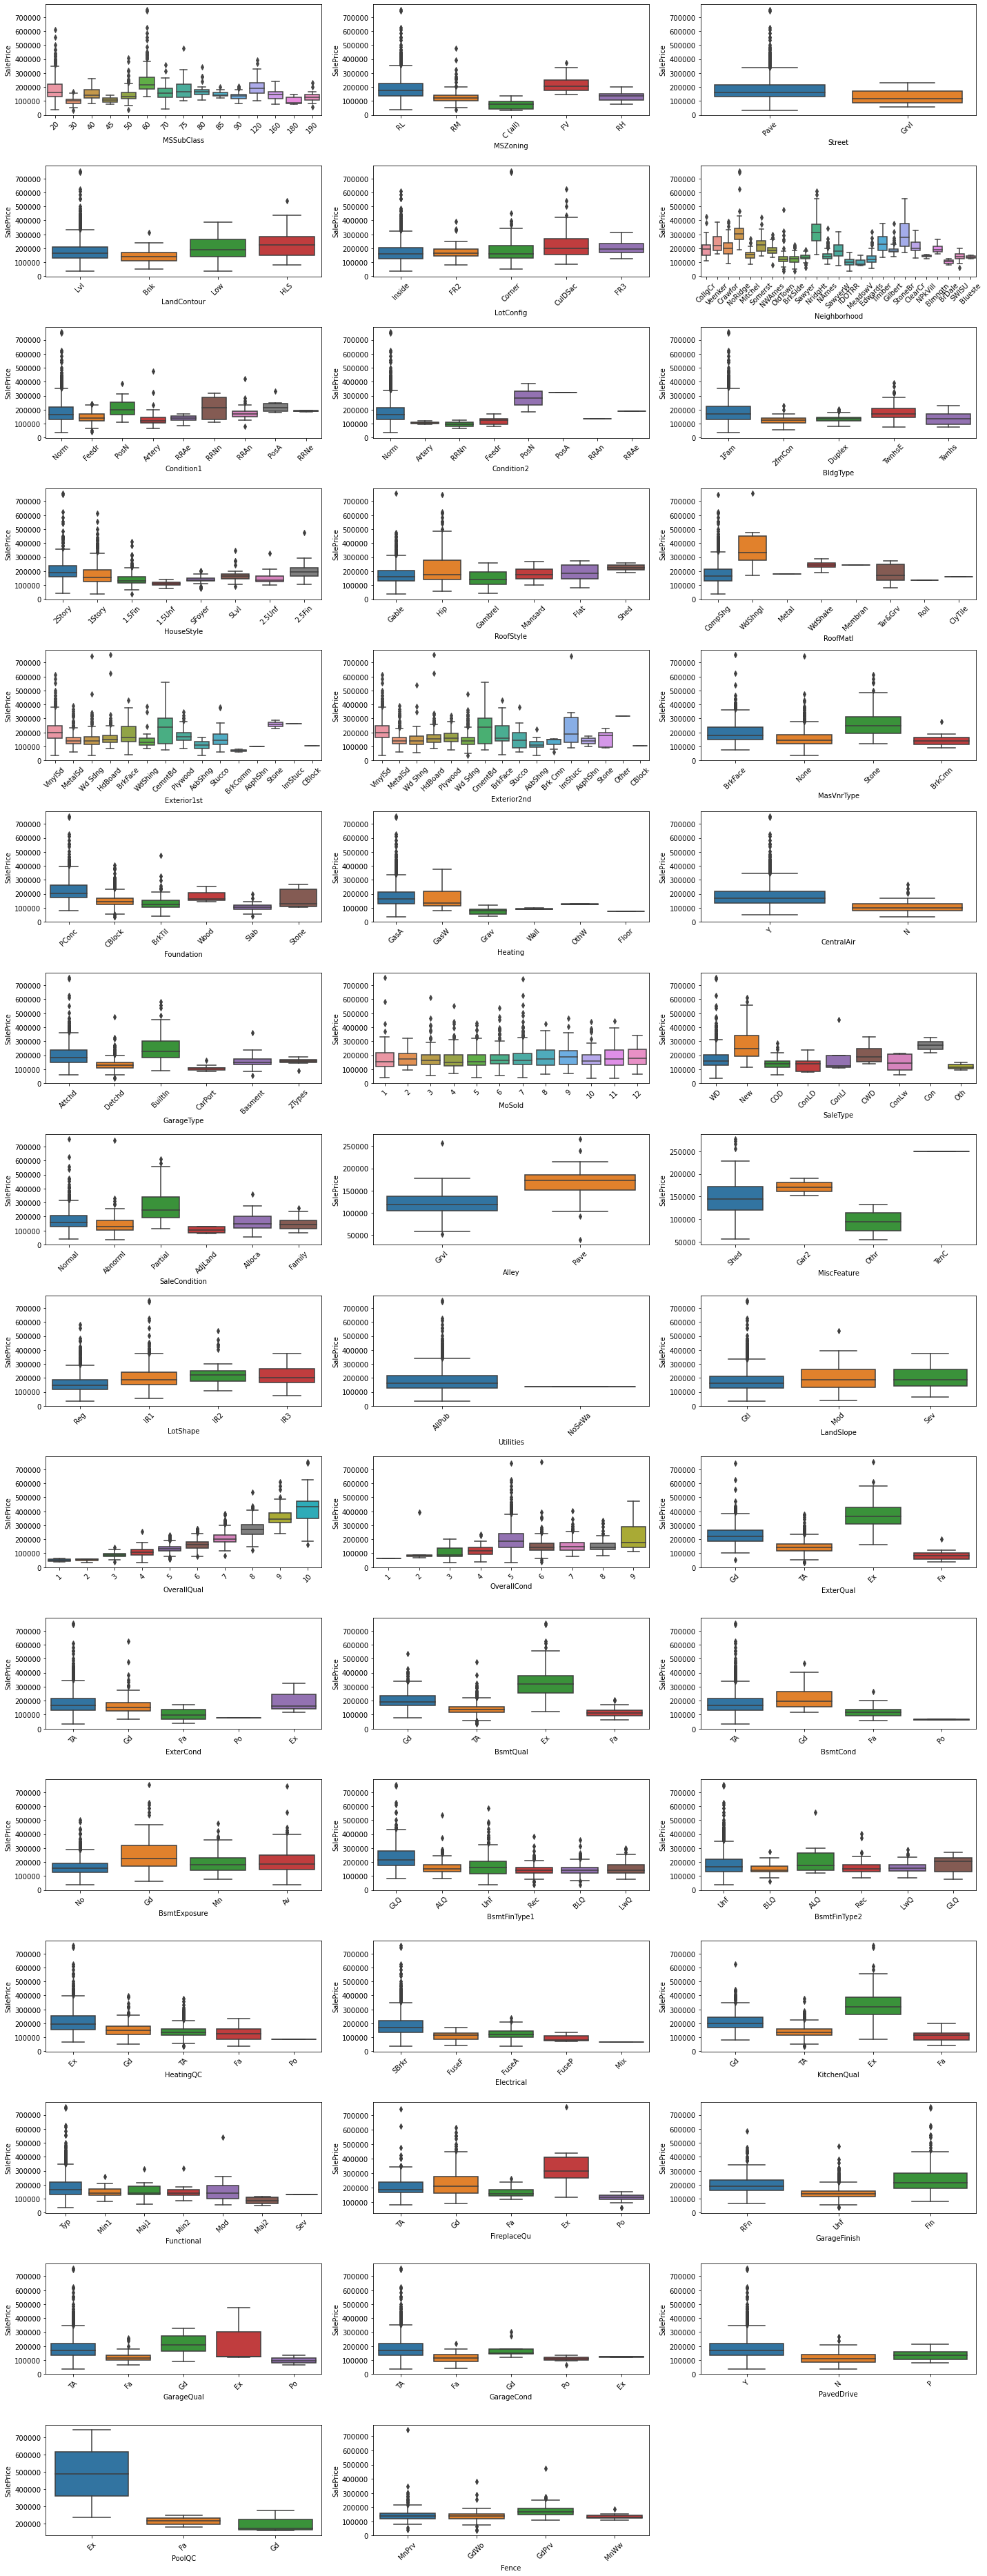

In [158]:
box_plots (train_data, categorical)

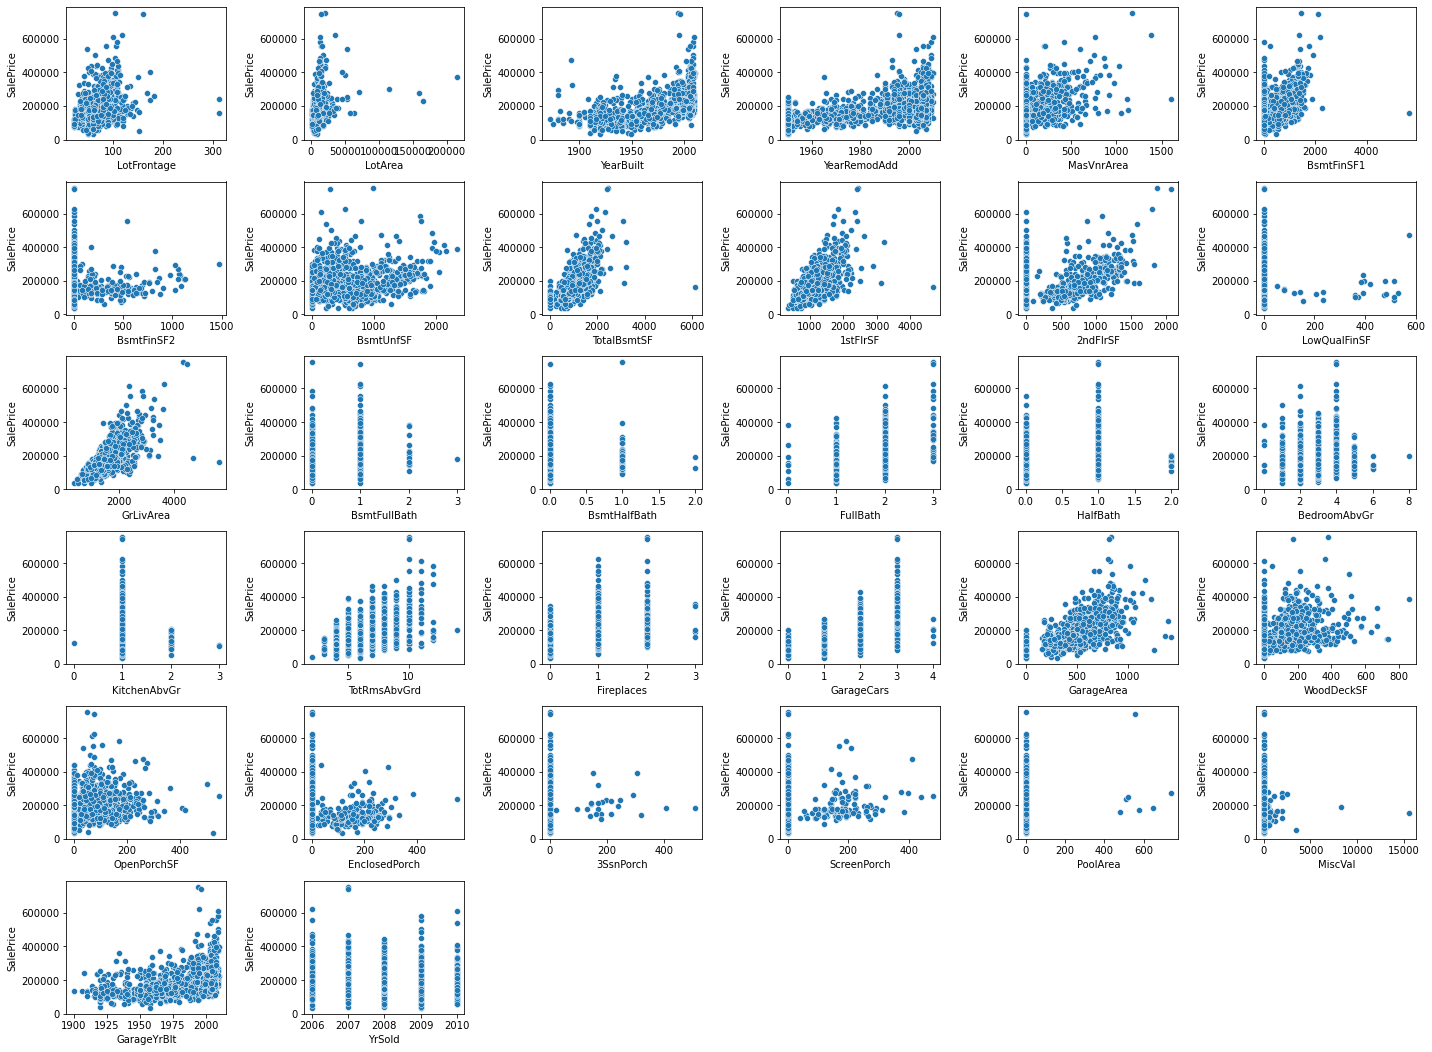

In [159]:
scatter_plots(train_data, numeric)

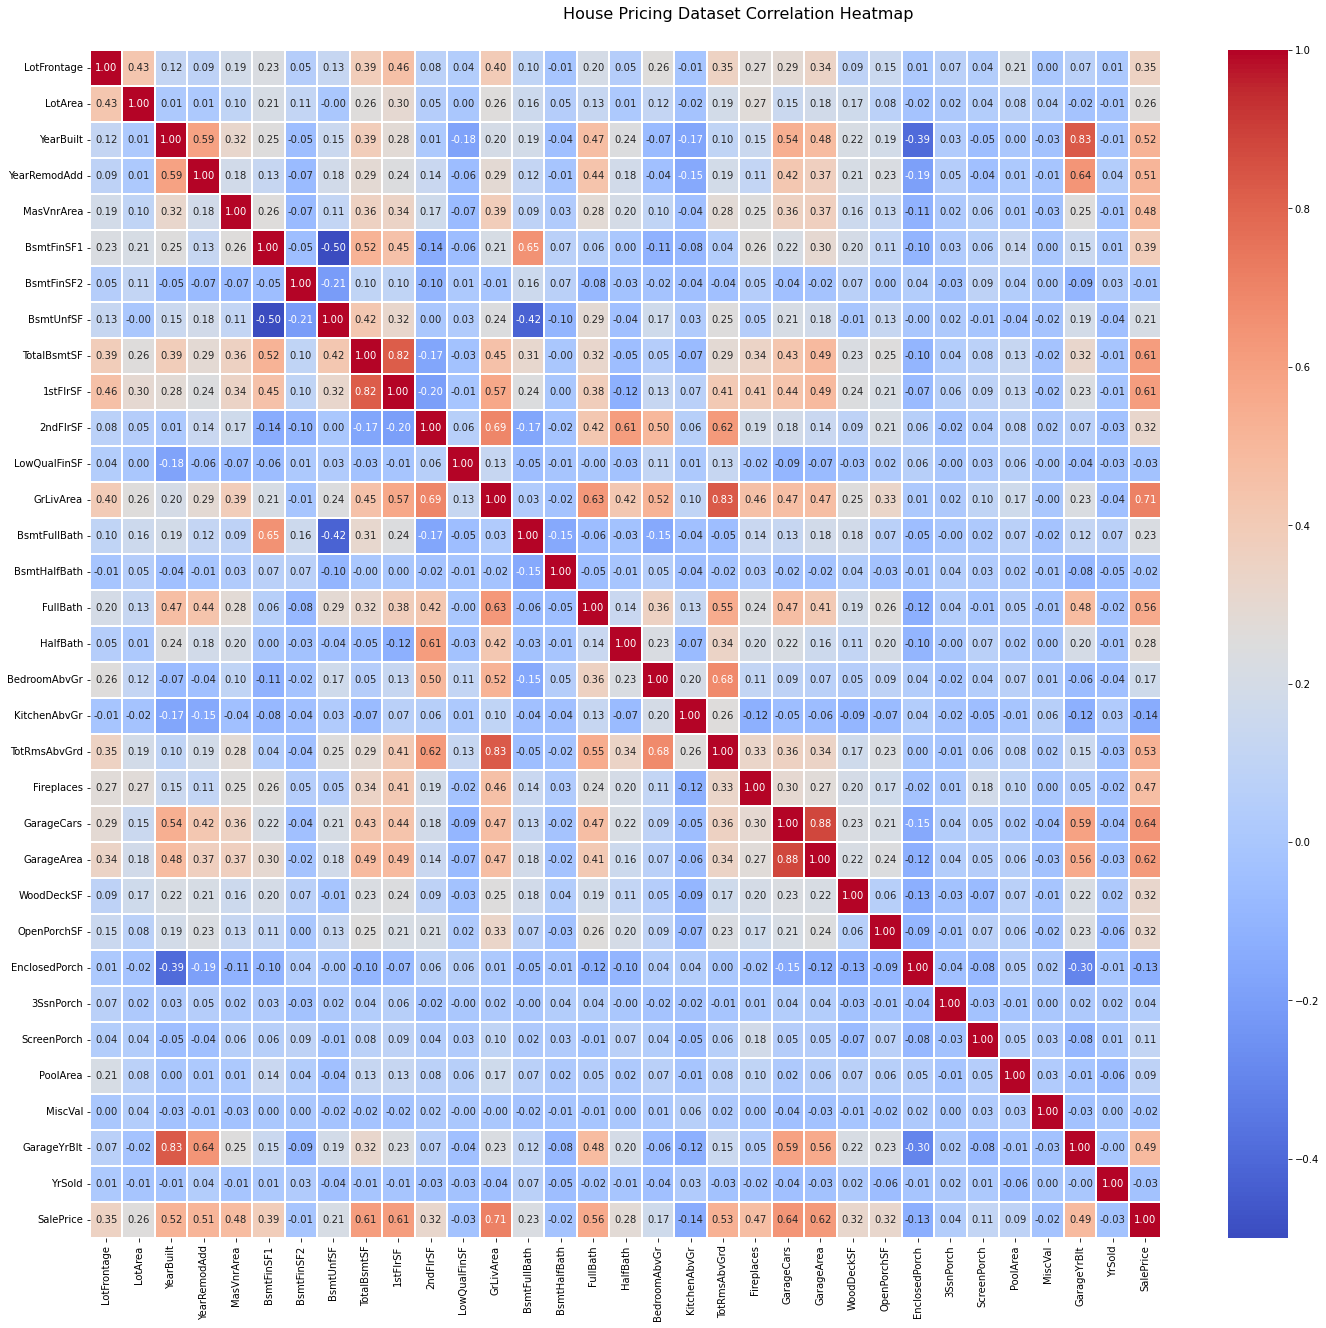

In [160]:
cor_heat_map(train_data, numeric)

## Analysis Conclusions

Observations:

Based on the correlation heatmap, several features show a significant correlation with the house SalePrice. These features include GrLivArea, GarageCars, GarageArea, TotalBsmtSF, and 1stFlrSF, with Pearson correlation coefficients of 0.6 or higher. On the other hand, there seems to be a weaker correlation between SalePrice and the remaining features, with Pearson correlation coefficients below 0.5.

Additionally, some features exhibit high correlation among themselves or have limited impact on explaining the variability in SalePrice, making them potential candidates for removal from the training dataset. These features include 'Id' (which is unique for each house), 'BsmntFinSF2', 'MiscVal', 'EnclosedPorch', and 'LowQualFinSF'.

Furthermore, scatter plots reveal a correlated relationship between the target variable and certain features such as 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, TotRmsAbvGrd, and TotalBsmtSF.

Lastly, box-plots provide insights into the distribution of SalePrice across different categories. Although no significant relationship is apparent in most cases, there are certain category levels where the median SalePrice shows statistical differences. Notably, the mean SalePrice tends to increase as the OverallQual of the house improves.

## Preprocessing

The ``DataPreprocessing`` class is designed to preprocess train and test dataframes for machine learning tasks. It provides methods to load data, apply transformations, impute missing values, encode ordinal variables, and convert data types.

By utilizing the methods provided by this DataPreprocessing class, you can load and preprocess your train and test data in a standardized and automated manner, ensuring that the data is properly transformed and ready for further analysis or modeling tasks.

In [125]:
class DataPreprocessing:
    """
    Preprocess train and test dataframes.

    Attributes:
    - train_data (pandas.DataFrame): The dataframe for the train data.
    - test_data (pandas.DataFrame): The dataframe for the test data.
    - nominal_columns (list): The list of nominal columns.
    - ordinal_columns (list): The list of ordinal columns.
    - ordinal_categories_list (list): The list of ordinal categories for ordinal encoding.
    - numerical_columns (list): The list of numerical columns.
    - target_column (str): The name of the target column.
    - categorical_columns (list): The list of categorical columns (nominal and ordinal).
    - feature_columns (list): The list of all feature columns (categorical and numerical).
    - cols_to_drop (list): The list of columns to drop.
    - ordinal_encoders (dict): The dictionary of ordinal encoders.
    - encoder: The encoder for ordinal encoding.

    Methods:
    - _load_data(file): Loads a CSV file into a pandas DataFrame.
    - _log_transform(df): Performs a log transformation of the target column.
    - _drop_missing_cols(df): Identifies and drops columns with a high proportion of missing data.
    - _impute_missing_values(df, categorical_features, numeric_features): Imputes missing values using strategies.
    - _ordinal_encode(df, ordinal_columns, ordinal_categories_list): Encodes ordinal variables using ordinal encoding.
    - _inverse_ordinal_encode(df, ordinal_columns): Inverse transforms ordinal encoded columns.
    - _create_train_data(train_file, preprocess=True): Loads and encodes the train data.
    - _create_test_data(test_file, preprocess=True): Loads and encodes the test data.
    - _convert_month_string(df): Maps numerical month names to string month names.
    - _convert_data_types(df): Converts categorical and numerical columns to the appropriate data types.
    """


    def __init__(self, train_file,
                  test_file,
                  nominal_columns,
                  ordinal_columns,
                  ordinal_categories_list,
                  numerical_columns,
                  target_column):
        #create new copies instead of references
        self.nominal_columns = list(nominal_columns)
        self.ordinal_columns = list(ordinal_columns)
        self.numerical_columns = list(numerical_columns)
        self.target_col = target_column
        self.ordinal_categories_list = list(ordinal_categories_list)
        self.categorical_columns = self.nominal_columns + self.ordinal_columns
        self.feature_cols = self.categorical_columns + self.numerical_columns + self.ordinal_columns
        self.cols_to_drop =[]
        self.ordinal_encoders = {}
        self.train_data = self._create_train_data(train_file)
        self.test_data  = self._create_test_data(test_file)
        self.encoder = None

    def _load_data(self,file):
        """
        Load a CSV file into a pandas DataFrame.

        Parameters:
        - file (str): The path to the CSV file.

        Returns:
        - pandas.DataFrame: The loaded dataframe.
        """
        return pd.read_csv(file)


    def _log_transform (self, df):
        """
        Perform a log transformation of the target column.

        Parameters:
        - df (pandas.DataFrame): The dataframe to transform.

        Returns:
        - pandas.DataFrame: The transformed dataframe.
        """
        
        df['SalePrice'] = np.log(df['SalePrice'])
        return df
    
    
    def _drop_missing_cols (self,df):
        """
        Identify and drop columns with a high proportion of missing data.

        Parameters:
        - df (pandas.DataFrame): The dataframe to process.

        Returns:
        - pandas.DataFrame: The processed dataframe.
        - list: The list of dropped columns.
        """
        
        dropped_cols = []  
        for col in df.columns:
            if df[col].isnull().sum()/df.shape[0] >= 0.8:
                dropped_cols.append(col)
        df.drop(columns=dropped_cols, inplace=True)
        
        return df, dropped_cols 
    
    
    def _impute_missing_values (self, df, categorical_features, numeric_features):
        """
        Impute missing values using strategies.

        Parameters:
        - df (pandas.DataFrame): The dataframe to process.
        - categorical_features (list): The list of categorical columns.
        - numeric_features (list): The list of numerical columns.

        Returns:
        - pandas.DataFrame: The processed dataframe.
        """
        
        imputer_con = SimpleImputer(missing_values=np.nan, strategy='median')
        imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        
        for col in categorical_features+numeric_features:
            if df[col].isnull().sum() > 0:    
                if col in categorical_features:              
                    df[col] = imputer_cat.fit_transform(df[col].values.reshape(-1,1))
                elif col in numeric_features:  
                    df[col] = imputer_con.fit_transform(df[col].values.reshape(-1,1))
        
        return df 


    def _ordinal_encode (self, df, ordinal_columns, ordinal_categories_list):
        """
        Encode ordinal variables using ordinal encoding.

        Parameters:
        - df (pandas.DataFrame): The dataframe to process.
        - ordinal_columns (list): The list of ordinal columns.
        - ordinal_categories_list (list): The list of ordinal categories for ordinal encoding.

        Returns:
        - pandas.DataFrame: The processed dataframe.
        """
        
        encoder = OrdinalEncoder(categories=ordinal_categories_list)
        df[ordinal_columns] = encoder.fit_transform(df[ordinal_columns])
        
        return df


    def _inverse_ordinal_encode (self, df, ordinal_columns):
        """
        Inverse transforms ordinal encoded columns.

        Parameters:
        - df (pandas.DataFrame): The dataframe to process.
        - ordinal_columns (list): The list of ordinal columns.

        Returns:
        - None
        """
        
        df[ordinal_columns] = self.encoder.inverse_transform(df[ordinal_columns]) 


    def _create_train_data(self, train_file, preprocess=True):
        """
        Load and encode the train data.

        Parameters:
        - train_file (str): The path to the train data file.
        - preprocess (bool): Flag indicating whether to preprocess the data.

        Returns:
        - pandas.DataFrame: The processed train data.
        """
        
        train_data = self._load_data(train_file)
        
        if preprocess:
            train_data = self._log_transform(train_data)
            train_data, self.cols_to_drop = self._drop_missing_cols(train_data)
            train_data = self._impute_missing_values(train_data, self.categorical_columns, self.numerical_columns)
            train_data = self._convert_month_string(train_data)
            train_data = self._ordinal_encode(train_data, self.ordinal_columns, self.ordinal_categories_list)
            train_data = self._convert_data_types(train_data)
        
        return train_data

    def _create_test_data (self,test_file, preprocess=True):
        """
        Load and encode the test data.

        Parameters:
        - test_file (str): The path to the test data file.
        - preprocess (bool): Flag indicating whether to preprocess the data.

        Returns:
        - pandas.DataFrame: The processed test data.
        """
        
        test_data = self._load_data(test_file)
        
        if preprocess:
            test_data = test_data.drop(columns=self.cols_to_drop, axis=1)
            test_data = self._impute_missing_values(test_data, self.categorical_columns, self.numerical_columns)
            test_data = self._convert_month_string(test_data)
            test_data = self._ordinal_encode(test_data, self.ordinal_columns, self.ordinal_categories_list) 
            test_data = self._convert_data_types(test_data)
            
        return test_data

    def _convert_month_string (self, df):
        """
        Map numerical month names to string month names.

        Parameters:
        - df (pandas.DataFrame): The dataframe to process.

        Returns:
        - pandas.DataFrame: The processed dataframe.
        """
        
        d = { 1 : 'Jan',
              2 : 'Feb',
              3 : 'Mar',
              4 : 'Apr',
              5 : 'May',
              6 : 'June',
              7 : 'July',
              8 : 'Aug',
              9 : 'Sep',
              10: 'Oct',
              11: 'Nov',
              12: 'Dec'
        }
        df['MoSold'] = df ['MoSold'].map(d)
        
        return df
    
    
    def _convert_data_types (self, df):
        """
        Convert categorical and numerical columns to the appropriate data types.

        Parameters:
        - df (pandas.DataFrame): The dataframe to process.

        Returns:
        - pandas.DataFrame: The processed dataframe.
        """
        
        df[self.nominal_columns] = df[self.nominal_columns].astype('O')
        df[self.ordinal_columns] = df[self.ordinal_columns].astype('int')
        df[self.numerical_columns] = df[self.numerical_columns].astype('int')
        
        return df


## Feature Engineering

The ``FeatureEngineering`` class is designed to perform feature engineering on a given dataset. It contains a pipeline of feature engineering steps that can be applied to the data to generate new features.

When initializing the ``FeatureEngineering`` object, it takes a DataPreprocessing object as a parameter. This object provides access to the data and necessary information about the categorical columns. The ``categorical_columns`` attribute stores the list of categorical columns from the ``DataPreprocessing`` object, and the pipeline attribute is initialized as None.

The ``create_pipeline`` method is responsible for creating the feature engineering pipeline. It takes the features dataframe and the target series as parameters. Inside the method, various feature engineering steps are defined and added to the pipeline. These steps include rare label encoding, ordinal encoding, creating relative features, creating math features, and dropping unnecessary features. The pipeline is then fitted with the provided features and target data.

The ``create_features`` method is used to transform the data and generate features. It takes a dataframe as input and applies the feature engineering pipeline to it. The transformed dataframe is returned as the result.

In [126]:
class FeatureEngineering:
    """
    Feature Engineering class.

    Attributes:
    - data (DataPreprocessing): The DataPreprocessing object.
    - categorical_columns (list): The list of categorical columns.
    - pipeline (sklearn.pipeline.Pipeline): The feature engineering pipeline.

    Methods:
    - create_pipeline(features, target): Creates the feature engineering pipeline.
    - create_features(df): Transforms the data and generates features.
    """
    
    def __init__(self, data):
        """
        Initialize the FeatureEngineering object.

        Parameters:
        - data (DataPreprocessing): The DataPreprocessing object.
        """
        
        self.data = data
        self.categorical_columns = data.categorical_columns
        self.pipeline = None
    
    def create_pipeline (self, features, target):
        """
        Create the feature engineering pipeline.

        Parameters:
        - features (pandas.DataFrame): The features dataframe.
        - target (pandas.Series): The target series.

        Returns:
        - None
        """
        rare_encoder = enc.RareLabelEncoder(tol = 0.05, n_categories=4, variables = data.nominal_columns)
        price_encoder = enc.OrdinalEncoder (encoding_method='ordered',  variables = data.nominal_columns)

        age = RelativeFeatures(
            variables=['YrSold'],
            reference=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'],
            func = ['sub']
        )     

        bath = MathFeatures(
            variables=['BsmtHalfBath', 'BsmtFullBath', 'FullBath', 'HalfBath'],
            func=['sum'],
            new_variables_names=['TotalBath'],
        )

        area = MathFeatures(
            variables=['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'],
            func=['sum'],
            new_variables_names=['TotalArea'],
        )

        drop = DropFeatures(
            features_to_drop=['YearBuilt','YrSold','YearRemodAdd', 'GarageYrBlt']
        )

        pipe = Pipeline(steps=[ 
                                ('rare_encoder', rare_encoder), 
                                ('ordinal_encoder', price_encoder),
                                ('cobinator',age),
                                ('bath', bath),
                                ('area', area),
                                ('drop', drop)
                            ])
        
        self.pipeline = pipe.fit(features, target)  
    
    def create_features(self,df):        
        """
        Transform data and generate features.

        Parameters:
        - df (pandas.DataFrame): The dataframe to transform.

        Returns:
        - pandas.DataFrame: The transformed dataframe.
        """
        
        df = self.pipeline.transform (df)
        
        return df
        

## Model Container: cross-validation, training and find the best model, save the model

The ``ModelContainer`` class serves as a container for training and evaluating machine learning models. It has various attributes and methods to facilitate the model selection and evaluation process.

When initializing a ModelContainer object, the attributes are initialized with default values, including the best algorithm, grid cross-validation objects, model scores, best model, best parameters, and evaluation metrics such as mean absolute error (MAE) and R-squared (R2) scores.

The ``nested_cross_validation`` method performs a nested cross-validation procedure to select the best algorithm. It initializes instances of different regression models, defines parameter grids for each model, and performs grid search cross-validation to find the best hyperparameters. The algorithm with the lowest mean root mean squared error (RMSE) score across the outer test folds is selected as the best algorithm.

The ``tune_best_algorithm`` method performs hyperparameter tuning on the best algorithm using the provided training set. It uses grid search cross-validation to search for the best combination of hyperparameters. The best model, best score, and best parameters are saved, and evaluation metrics (MAE and R2 scores) are calculated on both the training and test sets.

The ``best_model_predict`` method is used to generate predictions using the best model on a given set of features.

The ``get_feature_importance`` method retrieves and sorts the feature importances of a given model. If the model has feature importances available, they are returned as a sorted DataFrame. Otherwise, a message indicating the absence of feature importances is returned.

The print_summary method prints a summary of the models, including the best model, its CV score, and the best parameters. It also displays a bar plot of the top 25 feature importances.

In [127]:
class ModelContainer:
    
    def __init__(self):
        '''initializes model list and dicts'''
        self.best_algorithm  = None
        self.gridcvs = {}
        self.scores_dict = None
        self.best_model = None
        self.best_params  = None
        self.best_score  = 0
        self.predictions = None
        self.train_mae = 0
        self.test_mae  = 0
        self.train_r2  = 0
        self.test_r2   = 0
        self.mean_rmse = {}
        self.parameters = {}
    
        
    def nested_cross_validation(self, features, target):
        '''Perform nested 5x2 cross-validation and select the best algorithm.
        
        Args:
            features (array-like): Input features.
            target (array-like): Target variable.
        '''   
        reg_RF = RandomForestRegressor(random_state=1)
        reg_XGB = xgb.XGBRegressor(random_state=1)
        reg_LGBM = LGBMRegressor(random_state=1)   
                   
        param_grid_RF = {
                        'bootstrap': [True],
                        'max_depth': [80, 90, 100, 110],
                        'max_features': [2, 3],
                        'min_samples_leaf': [3, 4, 5],
                        'min_samples_split': [8, 10, 12],
                        'n_estimators': [100, 200, 300, 1000]
                        }
        
        param_grid_XGB = {
                        'min_child_weight': [1, 5, 10],
                        'gamma': [0.5, 1, 1.5, 2, 5],
                        'subsample': [0.6, 0.8, 1.0],
                        'colsample_bytree': [0.6, 0.8, 1.0],
                        'max_depth': [3, 4, 5]
                        }
        
        param_grid_LGBM = {'num_leaves': [6, 8, 20, 30],
                        'max_depth': [2, 4, 6, 8, 10],
                        'n_estimators': [50, 100, 200, 500],
                        'colsample_bytree': [0.3, 1.0]}

        
        self.parameters= {reg_RF:param_grid_RF, reg_XGB:param_grid_XGB, reg_LGBM:param_grid_LGBM}
        
    
        inner_cv = KFold(n_splits=2, shuffle=True, random_state=1)

        for pgrid, est, name in zip((param_grid_RF, param_grid_XGB, param_grid_LGBM),
                                    (reg_RF, reg_XGB, reg_LGBM),
                                    ('RForest','Xgboost', 'LightGBM')):

            gcv = GridSearchCV(estimator=est,
                               param_grid=pgrid,
                               scoring = 'neg_root_mean_squared_error',
                               n_jobs=-1,
                               cv=inner_cv,
                               verbose=0,
                               refit=True)
            self.gridcvs[name] = gcv


        outer_cv = KFold(n_splits=5, shuffle=True, random_state=1)
    
        for name, gs_est in sorted(self.gridcvs.items()):
            self.scores_dict = cross_validate(gs_est, 
                                         X=features, 
                                         y=target,
                                         verbose=0,
                                         cv=outer_cv,
                                         return_estimator=True,
                                         n_jobs=-1
                                        )

            print(50 * '-', '\n')
            print('Algorithm:', name)
            print('    Inner loop:')


            for i in range(self.scores_dict['test_score'].shape[0]):
                print('\n      Best RMSE Score (avg. of inner test folds) %.2f' % np.absolute(self.scores_dict['estimator'][i].best_score_))
                print('        Best parameters:', self.scores_dict['estimator'][i].best_estimator_)
                print('        RMSE Score (on outer test fold) %.2f' % np.absolute(self.scores_dict['test_score'][i]))
            print('\n%s |  outer test folds Ave. Score %.2f +/- %.2f' % 
                                  (name, np.absolute(self.scores_dict['test_score']).mean(), 
                                   np.absolute(self.scores_dict['test_score']).std()))    
            
            self.mean_rmse[gs_est] = np.absolute(self.scores_dict['test_score']).mean() 
            
        self.best_algorithm = min(self.mean_rmse, key=self.mean_rmse.get)
        print ('\nBest Performing Algorithm: ', self.best_algorithm.estimator)
    

   
    def tune_best_algorithm (self, feature_train, feature_test, target_train, target_test): 
        '''Perform hyperparameter tuning on the whole training set using the best algorithm.
        
        Args:
            feature_train (array-like): Training features.
            feature_test (array-like): Testing features.
            target_train (array-like): Training target variable.
            target_test (array-like): Testing target variable.
        '''
        gcv_model_select = GridSearchCV(estimator=self.best_algorithm.estimator,
                                        param_grid=self.parameters[self.best_algorithm.estimator],
                                        scoring='neg_root_mean_squared_error',
                                        n_jobs=-1,
                                        cv = 2,
                                        verbose=0,
                                        refit=True)

        gcv_model_select.fit(feature_train, target_train)
            
        self.best_model = gcv_model_select.best_estimator_
        self.best_score = gcv_model_select.best_score_
        self.best_params = gcv_model_select.best_params_
            
        self.train_mae = mean_absolute_error(y_true=np.exp(target_train), y_pred=np.exp(self.best_model.predict(feature_train)))
        self.test_mae  = mean_absolute_error(y_true=np.exp(target_test),  y_pred=np.exp(self.best_model.predict(feature_test)))

        self.train_r2 = r2_score (y_true=np.exp(target_train), y_pred=np.exp(self.best_model.predict(feature_train)))
        self.test_r2  = r2_score (y_true=np.exp(target_test),  y_pred=np.exp(self.best_model.predict(feature_test)))

   

    def best_model_predict(self, features):
        '''Score the input features using the best model.
        
        Args:
            features (array-like): Input features to be predicted.
        '''
        self.predictions = self.best_model.predict(features)
       
    
    def save_results(self):
        pass 
    
        
    @staticmethod
    def get_feature_importance(model, cols):
        '''Retrieve and sort the feature importances from the model.
        
        Args:
            model: Trained model object with feature_importances_ attribute.
            cols (list): Column names corresponding to the features.
            
        Returns:
            DataFrame: Sorted feature importances with columns 'feature' and 'importance'.
                Indexed by 'feature'.
        '''
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            cols = model.feature_name_
            feature_importances = pd.DataFrame({'feature':cols, 'importance':importances})
            feature_importances.sort_values(by='importance', ascending=False, inplace=True)
            #set index to 'feature'
            feature_importances.set_index('feature', inplace=True, drop=True)
            return feature_importances
        else:
            #some models don't have feature_importances_
            return "Feature importances do not exist for given model"

        
    def print_summary(self):
        '''Print a summary of the models, the best model, and feature importance.'''
        print('\nModel Summaries:\n')
        
        print('Best Estimator:' ,self.best_model)
        print('Best CV Score: %.2f' % np.abs(self.best_score))
        print('Best Parameters: %s' % self.best_params)
        
        print('\nTrain MAE: %.2f' % self.train_mae)
        print(' Test MAE: %.2f' %  self.test_mae)

        print('\nTrain R2: %.2f' % self.train_r2)
        print(' Test R2: %.2f' %   self.test_r2)
            
        feature_importances = self.get_feature_importance(self.best_model, data.feature_cols)
        feature_importances[0:25].plot.bar(figsize=(20,10))
        plt.show()
    
    
    
    def save_best_model(self, filepath = 'best_model.pkl'):
        """
        Save a regression model to a file.

        Parameters:
        - model: The regression model object.
        - filepath (str): The path to save the model file.

        Returns:
        - None

        Example Usage:
        >>> model = YourRegressionModel()
        >>> # Train the model...
        >>> save_regression_model(model, 'model.pkl')
        """
        joblib.dump(self.best_model, filepath)
        



In [128]:
filepath = 'data/house-prices/'
    
train_file = filepath + 'train.csv'
test_file =  filepath + 'test.csv'

test_file

'data/house-prices/test.csv'

-------------------------------------------------- 

Algorithm: LightGBM
    Inner loop:

      Best RMSE Score (avg. of inner test folds) 0.13
        Best parameters: LGBMRegressor(colsample_bytree=0.3, max_depth=6, num_leaves=6, random_state=1)
        RMSE Score (on outer test fold) 0.12

      Best RMSE Score (avg. of inner test folds) 0.13
        Best parameters: LGBMRegressor(max_depth=2, n_estimators=500, num_leaves=6, random_state=1)
        RMSE Score (on outer test fold) 0.16

      Best RMSE Score (avg. of inner test folds) 0.14
        Best parameters: LGBMRegressor(colsample_bytree=0.3, max_depth=6, num_leaves=20, random_state=1)
        RMSE Score (on outer test fold) 0.12

      Best RMSE Score (avg. of inner test folds) 0.13
        Best parameters: LGBMRegressor(colsample_bytree=0.3, max_depth=4, num_leaves=20, random_state=1)
        RMSE Score (on outer test fold) 0.13

      Best RMSE Score (avg. of inner test folds) 0.14
        Best parameters: LGBMRegressor(col

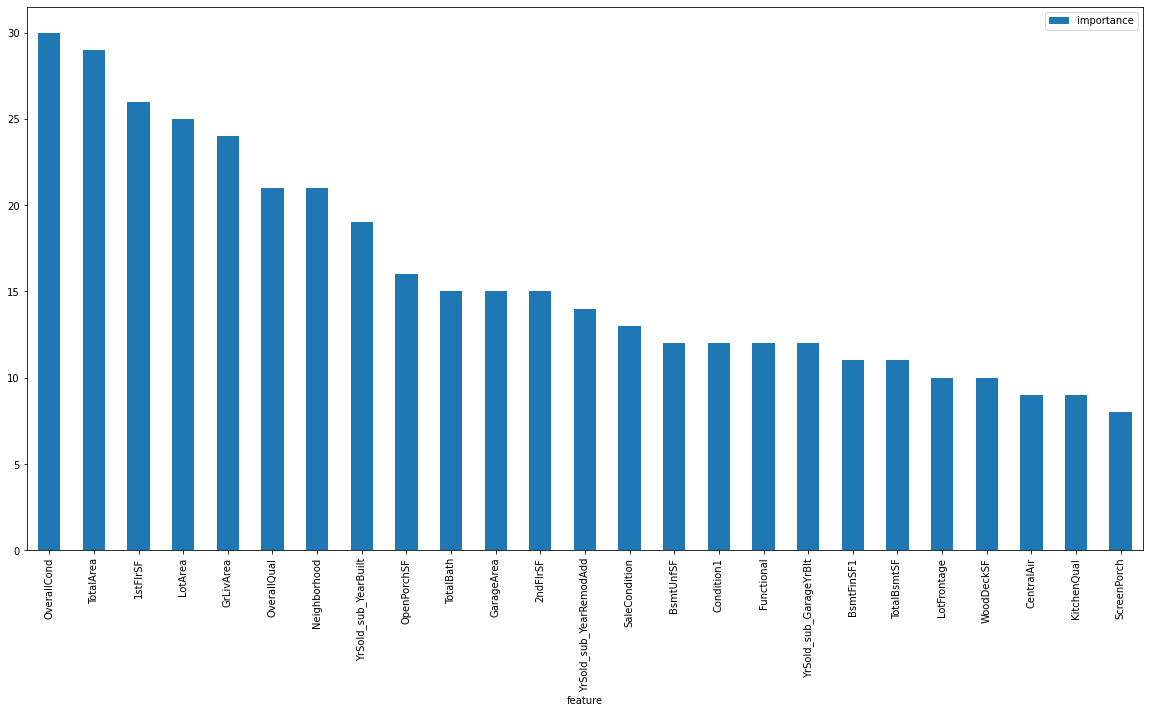

In [129]:
if __name__=='__main__':
    
    # instance global variables
    filepath = 'data/house-prices/'
    
    train_file = filepath + 'train.csv'
    test_file =  filepath + 'test.csv'
    
    nominal_columns = ['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 
                   'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                   'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                   'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MoSold',
                   'SaleType', 'SaleCondition'] # removed Alley, MiscFeature, 

    ordinal_columns = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 
                   'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                   'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 
                   'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                   'PavedDrive'] #removed PoolQC, Fence,


    numerical_columns = ['Id','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
                  'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                  'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd',
                  'Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                   '3SsnPorch','ScreenPorch','PoolArea','MiscVal', 'GarageYrBlt', 'YrSold'] # removed the SalePrice

    
    target_column ='SalePrice'
    
    
    lot_shape = ['IR3','IR2','IR1','Reg']
    utilities = ['ELO', 'NoSeWa', 'NoSewr','AllPub']
    land_slope = ['Sev','Mod','Gtl']
    overall_qual = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  
    overall_cond = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  
    exter_qual = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
    exter_cond = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
    bsmt_qual  = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    bsmt_cond  = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    bsmt_exposure  = ['NA', 'No', 'Mn', 'Av', 'Gd']
    bsmt_fin_type1 = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
    bsmt_fin_type2 = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
    heating_qual = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
    electrical = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
    kitchen_qual = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
    functional = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
    fire_place_qual = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    garage_finish = ['NA', 'Unf', 'RFn', 'Fin']
    garage_qual = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    garage_cond = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    paved_drive = ['N', 'P', 'Y']

    ordinal_categories_list = [lot_shape , utilities, land_slope, overall_qual, overall_cond, exter_qual, exter_cond, bsmt_qual, 
                              bsmt_cond, bsmt_exposure, bsmt_fin_type1, bsmt_fin_type2, heating_qual, electrical, kitchen_qual,
                              functional, fire_place_qual, garage_finish, garage_qual, garage_cond, paved_drive] 
    
    
    #turn feature engineering on/off
    engineer_features = True
    
    #Create Data object
    data = DataPreprocessing(train_file,
                             test_file,
                             nominal_columns,
                             ordinal_columns,
                             ordinal_categories_list,
                             numerical_columns,
                             target_column)
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(data.train_data.drop(['Id', 'SalePrice'], axis=1),data.train_data['SalePrice'],
                                                             test_size=0.2,
                                                             random_state=0)

    X_features = data.test_data.drop(columns=['Id'], axis=1)
    
    
    #Engineer features
    if engineer_features:
        feature_generator = FeatureEngineering(data)
        feature_generator.create_pipeline(X_train, y_train)
        X_train = feature_generator.create_features(X_train)
        X_test  = feature_generator.create_features(X_test)
        X_features = feature_generator.create_features(X_features)
    
       
    #Create model container
    models = ModelContainer()
    models.nested_cross_validation(X_train, y_train)
    models.tune_best_algorithm(X_train, X_test, y_train, y_test)
    models.best_model_predict(X_features)
    models.print_summary()

### Save Model


Model Summaries:

Best Estimator: LGBMRegressor(colsample_bytree=0.3, max_depth=4, num_leaves=6, random_state=1)
Best CV Score: 0.13
Best Parameters: {'colsample_bytree': 0.3, 'max_depth': 4, 'n_estimators': 100, 'num_leaves': 6}

Train MAE: 11789.50
 Test MAE: 16645.64

Train R2: 0.94
 Test R2: 0.85


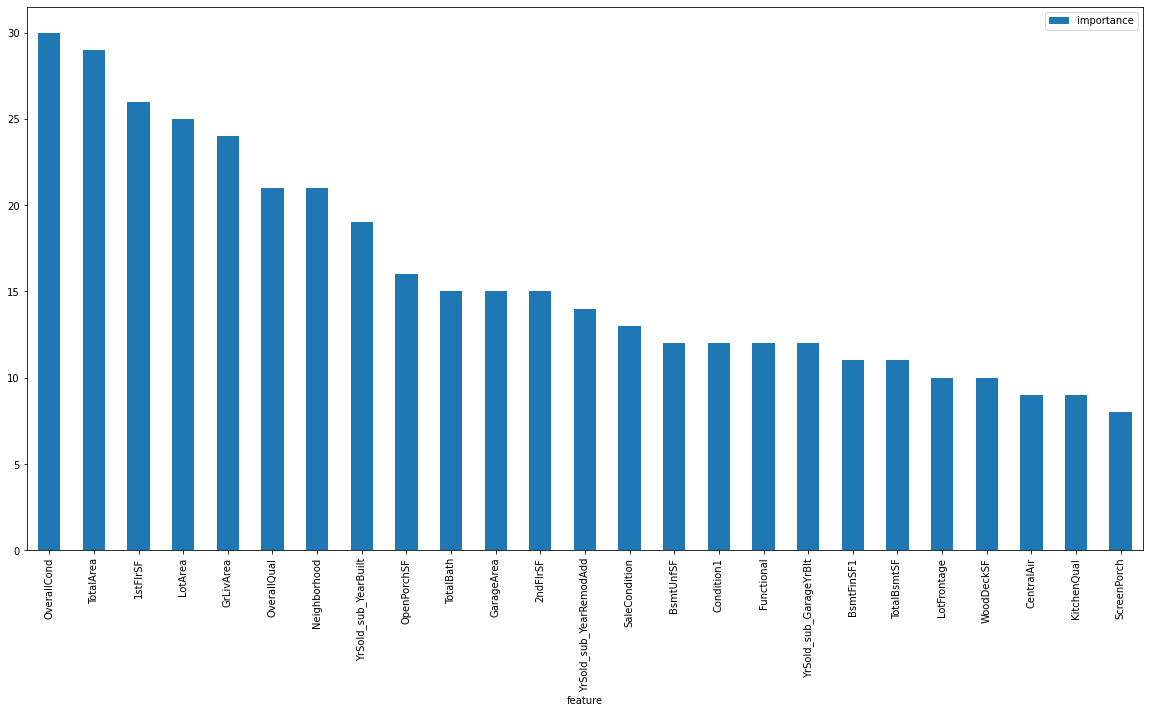

In [130]:

import pickle

models.best_model_predict(X_features)
models.print_summary()

Feature importance refers to the relative importance or contribution of different features or variables in a predictive model. It helps us understand which features have a stronger influence on the target variable and provides insights into the underlying patterns and relationships in the data.

In the context of the provided code, feature importance is addressed in the ``get_feature_importance`` method within the ``ModelContainer`` class. This method retrieves and sorts the feature importances from a trained model, specifically those models that have a ``feature_importances_`` attribute.

Here's how the ``get_feature_importance`` method works:

It takes two arguments: model (the trained model object) and cols (the column names corresponding to the features).

If the model has the feature_importances_ attribute, it retrieves the feature importances using model.feature_importances_.

It creates a DataFrame called feature_importances with two columns: 'feature' and 'importance'.

The feature importances are sorted in descending order using feature_importances.sort_values(by='importance', ascending=False).

The index of feature_importances is set to ``'feature'`` using ``feature_importances.set_index('feature', inplace=True, drop=True)``.

The method returns the sorted feature importances DataFrame.

By analyzing the feature importances, you can gain insights into which features have the most significant impact on the model's predictions. Features with higher importance values are considered more influential in the model's decision-making process.

The ModelContainer class utilizes the get_feature_importance method within the ``print_summary`` method to print a summary of the models, the best model, and the feature importance. It plots and visualizes the top 25 features with the highest importances using a bar chart.

Understanding feature importance helps in various aspects of machine learning, including:

Feature selection: By identifying the most important features, you can prioritize and select relevant features for model training, which can improve model performance and reduce overfitting.

Feature engineering: Feature importance analysis can guide you in creating new features or transforming existing ones to enhance their impact on the target variable.

Model interpretation: Feature importance provides insights into the relationship between features and the target variable, allowing you to explain and interpret the model's predictions.

Business understanding: Feature importance can assist in understanding which factors or variables have the most significant impact on the outcome, enabling better decision-making and understanding of the problem domain.

It's important to note that feature importance is model-specific. Different algorithms and models might yield different feature importances for the same dataset. Therefore, it's essential to consider the context, assumptions, and limitations of the specific model used when interpreting feature importance results.

## The Best Model: LightGBM

The ``LightGBM`` ``Regressor`` is a powerful algorithm for regression tasks, designed to provide high-performance gradient boosting. LightGBM stands for "Light Gradient Boosting Machine," and it is known for its efficiency, speed, and ability to handle large-scale datasets.

Our best algorithm is the lightgbm the following parameters:

``colsample_bytree=0.3``: This parameter controls the subsampling of features during the construction of each tree. It specifies the fraction (0.0 to 1.0) of features to consider for each tree. A lower value can help reduce overfitting by introducing randomness and reducing the correlation between trees.

``max_depth=4``: This parameter sets the maximum depth of each tree in the ensemble. A higher value allows the model to capture more complex relationships but increases the risk of overfitting. Limiting the depth helps control the model's complexity and prevents overfitting in some cases.

``num_leaves=6``: This parameter defines the maximum number of leaves (terminal nodes) in each tree. Increasing the value allows the model to capture more interactions and potentially improve performance. However, a large number of leaves can lead to overfitting, so it's important to choose an optimal value based on the dataset and problem at hand.

``random_state=1``: This parameter sets the random seed to ensure reproducibility of the model. By setting a fixed random state, the model will produce the same results when trained multiple times with the same data and configuration.

These parameters help control the complexity, generalization, and randomness of the LGBMRegressor model. 

In [131]:
best_model = models.best_model
best_model


LGBMRegressor(colsample_bytree=0.3, max_depth=4, num_leaves=6, random_state=1)

### Read the best model saved

To read a model using Joblib, you can use the joblib.load() function provided by the Joblib library. Joblib is a library in Python that allows efficient serialization and deserialization of Python objects, including machine learning models.

In [132]:
import joblib


def read_best_model(filepath = 'best_model.pkl'):
    """
    Load a saved regression model and make predictions on new data.

    Parameters:
    - filepath (str): The path to the saved model file.
    - data: The new data to make predictions on.

    Returns:
    - numpy.ndarray: The predicted values.

    Example Usage:
    >>> data = YourNewData()
    >>> predictions = deploy_regression_model('model.pkl', data)
    >>> print(predictions)
    """
    model = joblib.load(filepath)
    return model



In [140]:

def deployed_prediction(deployed_model, data):
    """
    return the predictions made by a deployed model.

    Parameters:
    - deployed_model: The deployed regression model .pkl.
    - data: The new data to make predictions on.

    Returns:
    - numpy.ndarray: The adjusted predicted values.

    Example Usage:
    >>> model = YourDeployedModel()
    >>> data = YourNewData()
    >>> predictions = deployed_prediction(model, data)
    >>> print(predictions)
    """
    
    return np.exp(deployed_model.predict(data))


In [161]:
# testing the deployed prediction
test_model = read_best_model('best_model.pkl')
test_prediction = deployed_prediction(test_model,X_test)
test_prediction

array([237877.5866764 , 153985.60532016, 115181.1867624 , 197071.29103084,
        89633.4034317 ,  91036.77722948, 238582.90726084, 136905.08742981,
       442113.75961557, 149820.80821653, 191308.91961459, 153761.48400287,
       231201.07580561, 129073.47317731, 128325.07061228, 145772.38068846,
       219158.40332624, 122812.02352391, 144540.58688359, 183801.92028127,
       116395.57693292, 151108.80211773, 101841.87395708, 163215.85453091,
       202371.01250437, 193856.92669994, 173500.27159926,  76277.76132208,
       314575.7494872 , 108526.21162762, 152903.28179442, 197535.5976226 ,
       151551.81997255, 301689.84244338, 324058.499164  , 194308.2128422 ,
       290025.1096785 , 123681.58934335, 231217.71159086, 334776.8809181 ,
       217403.08645012, 124706.69986608, 188667.44889644, 303031.96073701,
       387058.32096048, 147099.0967465 , 120778.05081514, 126590.97625979,
       165565.4882257 ,  97268.53847429, 434477.72617317, 150671.29845199,
       165423.87740161,  

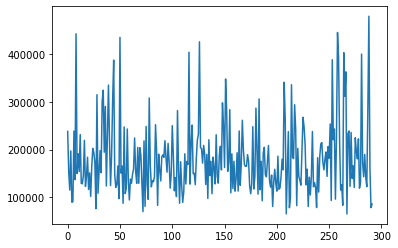

In [163]:
plt.plot(test_prediction)

## End-User Model Availability

To make the results of my end-user model available to others, I would follow these steps:

 - Hosting the Model: I would host my deployed model on a server or a cloud platform so that it can be accessed by others. I would consider options such as AWS, Google Cloud, or Microsoft Azure, or server hosting solutions like Flask or Django.

 - API Development: Once my model is hosted, I would create an API (Application Programming Interface) that allows users to send requests and receive predictions. I would use frameworks like Flask, Django, or FastAPI to develop the API. I would define an endpoint that accepts input data and returns the predictions.

 - Data Validation: Before making predictions, it's important to validate the input data to ensure it meets the required format and constraints. I would check for missing values, data types, or any other validation rules specific to my model. If the data does not pass the validation, I would return an appropriate error response.

 - Model Loading: In the API, I would load the deployed model into memory. I would use the joblib library or any other relevant method to load the model from the saved file. I would ensure that the model file is accessible from the server or specify the correct file path.

 - Prediction Handling: Once the model is loaded, I would use it to make predictions on the input data received through the API. I would pass the data to the model and retrieve the predicted values. If needed, I would perform any adjustments or post-processing on the predictions before returning them to the user.

 - Response Formatting: I would format the predictions into a suitable format for the API response. It can be JSON, CSV, or any other format that works best for my use case. I would include any necessary information along with the predictions, such as success status, error messages (if any), or additional metadata.

 - API Deployment: I would deploy my API on a server or cloud platform, ensuring it is accessible to users. This would involve configuring the server, setting up network access, and managing any required dependencies. I would thoroughly test the API to ensure it functions as expected.

 - Documentation: I would provide clear and concise documentation on how users can interact with my API. I would explain the required input format, any limitations or constraints, and how to interpret the response. I would include example usage and code snippets to assist users in integrating my model into their applications.


## Architecture

A simple architecture for implementation would follow this flow below:

See that a good part is already being done, what would remain to be implemented would be a model service and a model monitor, which can be considered stable libraries such as bentoml and mlflow for the respective steps.

See that a threshold would mark the need for training and re-execution of the pipeline.

![flaskdeploy](model_deployment.png)